# Visualization with Seaborn

## Seaborn VS. Matplotlib

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [15]:
# Create some data for messing around with

rng = np.random.RandomState(1)
x = np.linspace(0, 10, 500)
y = y = np.cumsum(rng.randn(500,6), 0)

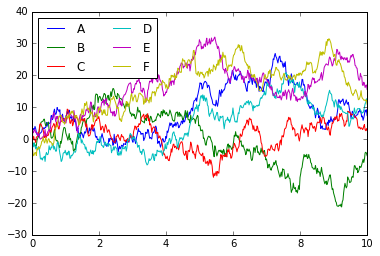

In [16]:
# plot the data with matplotlib defaults
plt.plot(x, y)
plt.legend("ABCDEF", ncol=2, loc='upper left');

In [18]:
import seaborn as sns
sns.set()

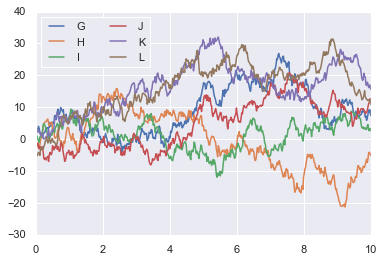

In [19]:
plt.plot(x,y)
plt.legend('GHIJKL', ncol=2, loc='upper left')

## Histograms, KDE, and densities

/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.
/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


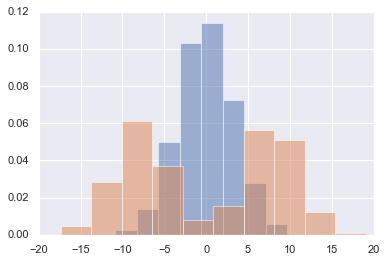

In [66]:
data1 = np.random.multivariate_normal([0,8], [[10,2],[6,10]], size=2000)
data2 = np.random.multivariate_normal([0,-8], [[10,2],[6,10]], size=2000)
data = np.concatenate([data1,data2])
data = pd.DataFrame(data, columns=['x','y'])


for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

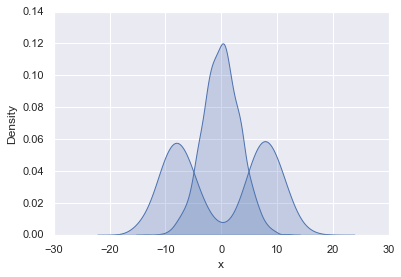

In [67]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)
    

/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


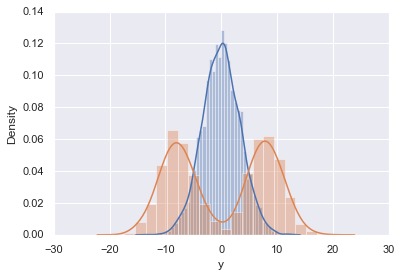

In [68]:
sns.distplot(data['x'])
sns.distplot(data['y']);

/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


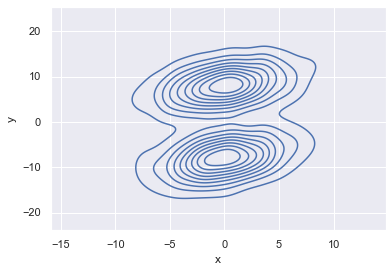

In [69]:
sns.kdeplot(data['x'], data['y']);

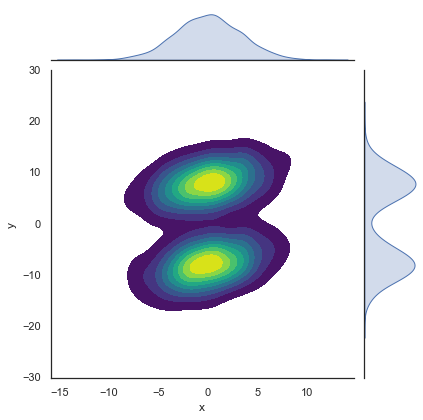

In [83]:
with sns.axes_style('white'):
    sns.jointplot(x="x",y="y", data=data, kind='kde', fill=True, cmap='viridis')
    


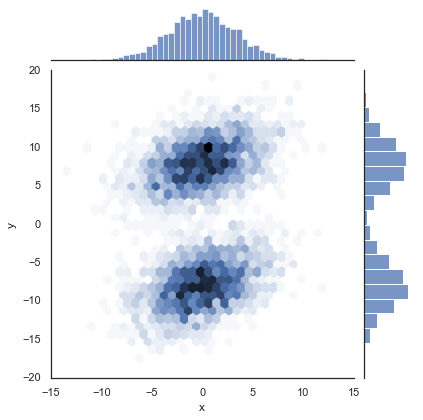

In [85]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

## Pair Plots

In [86]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


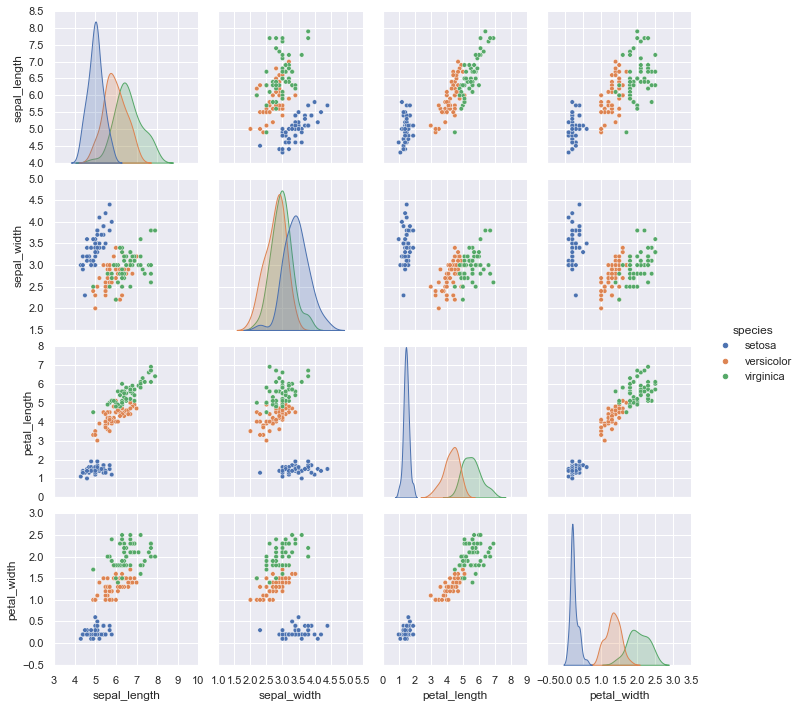

In [89]:
sns.pairplot(iris, hue='species', height=2.5)

## Faceted Histograms

In [90]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


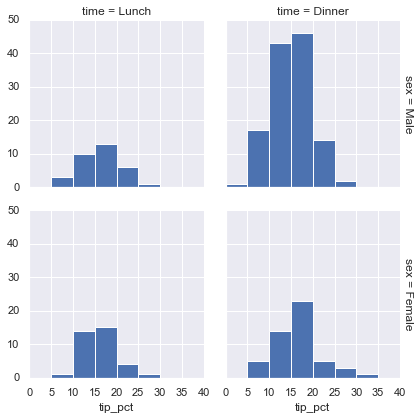

In [97]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 9));

## Factor Plots

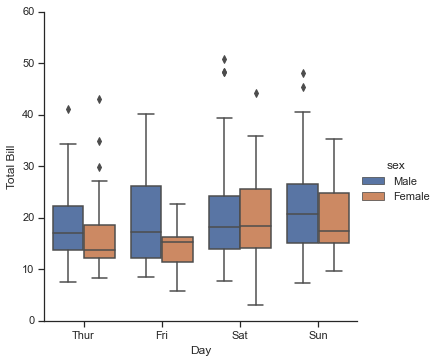

In [100]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

## Joint Distribution

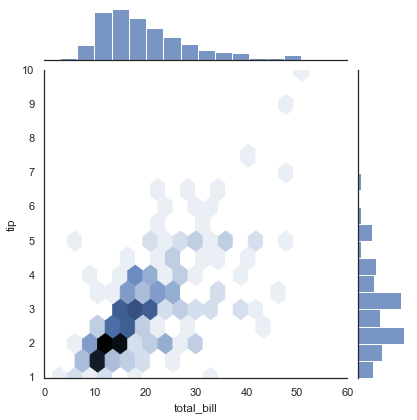

In [101]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

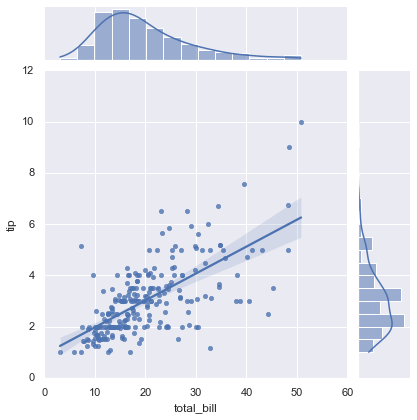

In [102]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

## Bar Plots

In [103]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


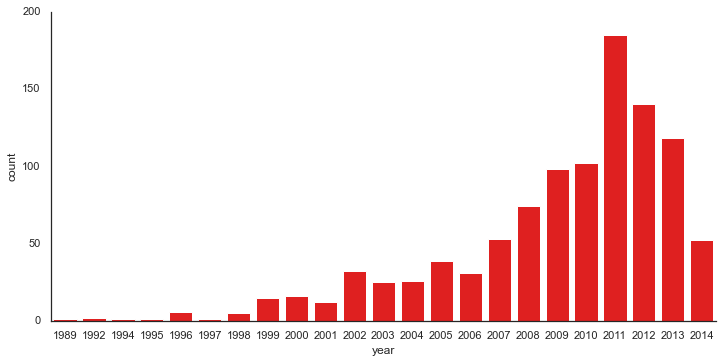

In [105]:
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=2, kind='count', color='red')

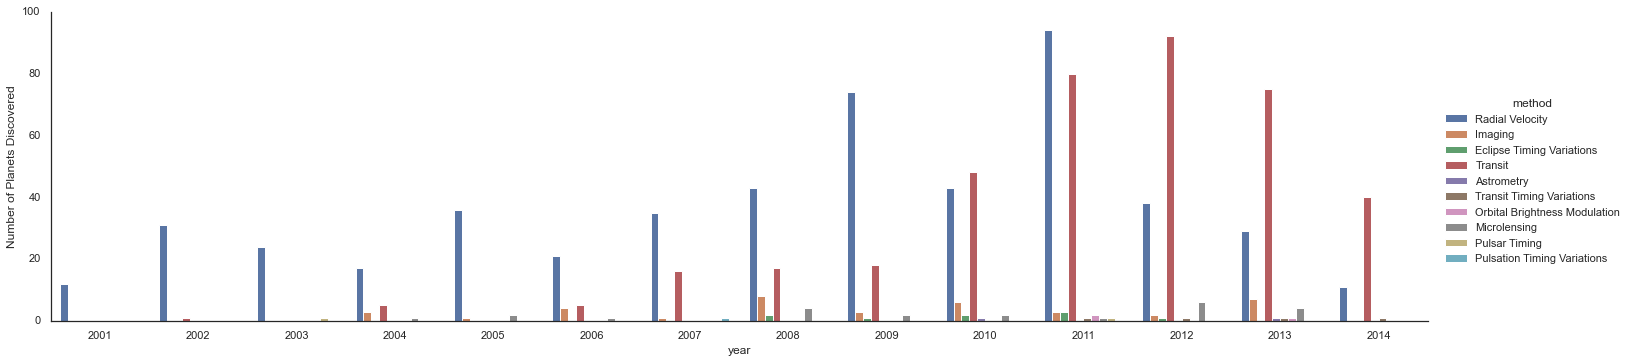

In [106]:
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=4.0, kind='count', hue='method', order=range(2001,2015))
    g.set_ylabels('Number of Planets Discovered')

## Example: Exploring Marathon Finishing Times

In [141]:
data = pd.read_csv('/Users/anthonyesposito/marathon-data.csv')

In [142]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [143]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [144]:
import datetime as time

In [146]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return dt.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('/Users/anthonyesposito/marathon-data.csv', converters={'split':convert_time, 'final': convert_time})

In [147]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [148]:
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [149]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9

In [150]:
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


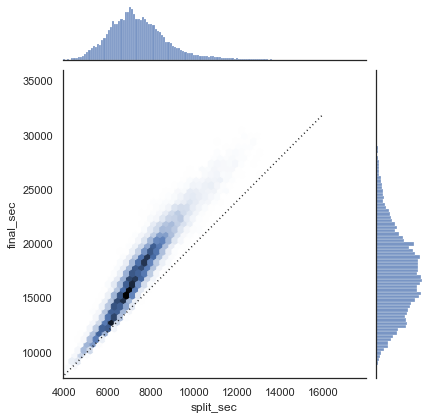

In [151]:
with sns.axes_style('white'):
    g = sns.jointplot(x='split_sec', y='final_sec', data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [152]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


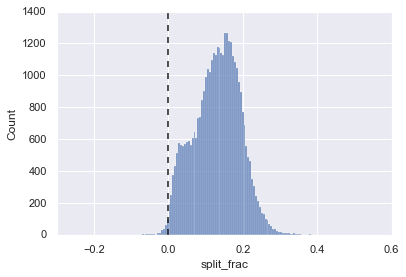

In [155]:
sns.histplot(data['split_frac'], kde=False);
plt.axvline(0, color='k', linestyle='--')

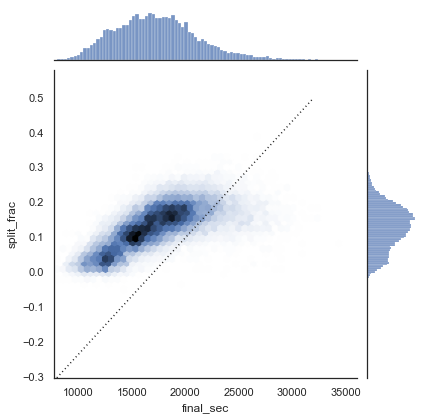

In [157]:
with sns.axes_style('white'):
    g = sns.jointplot(x='final_sec', y='split_frac', data=data, kind='hex')
    g.ax_joint.plot(np.linspace(8000, 32000), np.linspace(-0.3, .5), ':k')

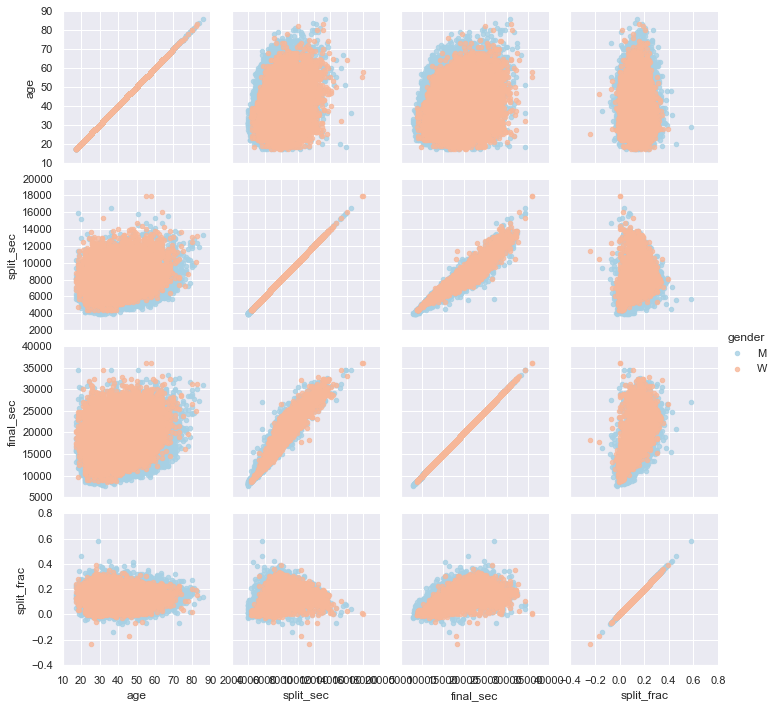

In [160]:
g = sns.PairGrid(data=data,vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

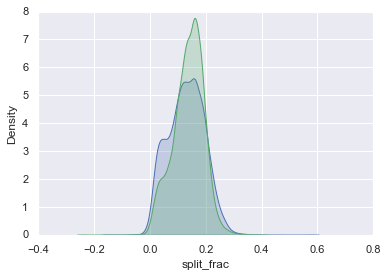

In [164]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True, color='b')
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True, color='g')
plt.xlabel('split_frac');

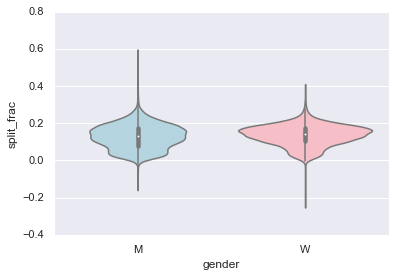

In [166]:
sns.violinplot(x='gender', y='split_frac', data=data, palette=['lightblue', 'lightpink']);

In [167]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


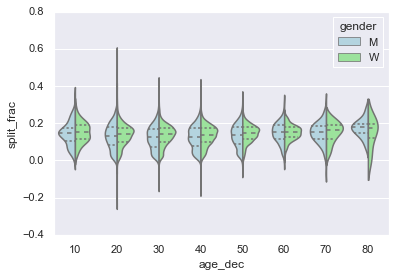

In [168]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x='age_dec', y='split_frac', hue='gender', data=data, split=True, inner='quartile', palette=['lightblue', 'lightgreen'])

In [170]:
(data.age>80).sum()

7

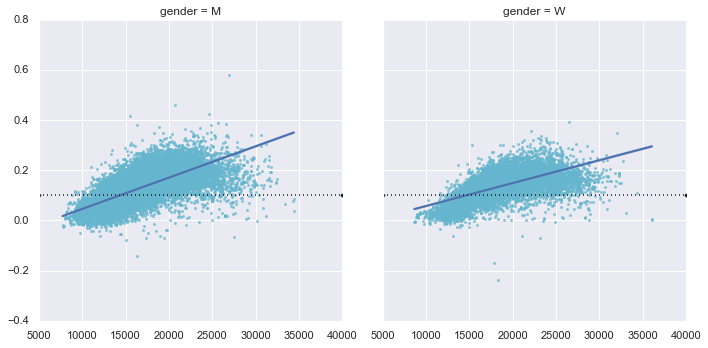

In [171]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
              markers='.', scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color='k', ls=':')